In [1]:
import sys
import os

# 1. Chemin vers la racine de le CODE 
root_code = r'C:\Users\mathi\OneDrive\Documents\1. COURS SORBONNE\Machine Learning\Matcha TTS\Nouveau Matcha-TTS\Matcha-TTS-etu-UPMC-ENSAM'
if root_code not in sys.path:
    sys.path.append(root_code)

# 2. Chemin vers les DONNÉES LJSpeech
data_path = r'C:\Users\mathi\OneDrive\Documents\1. COURS SORBONNE\Machine Learning\Matcha TTS\Nouveau Matcha-TTS\data\LJSpeech-1.1'

import torch
import numpy as np
from scipy.io.wavfile import read

In [2]:
from matcha.utils.audio_process import MelSpectrogram, load_and_process_audio
from matcha.utils.utils import plot_spectrogram

In [ ]:
"""
Initialise les paramètres pour le calcul du spectrogramme Mel.

Args:
    n_fft (int): Nombre de points pour la FFT. Détermine la résolution en fréquence.
                Si > win_size, un zero-padding est appliqué.
    num_mels (int): Nombre de bandes Mel. L'échelle Mel imite la perception humaine des fréquences.
    sampling_rate (int): Fréquence d'échantillonnage du signal (en Hz).
    hop_size (int): Nombre d'échantillons entre deux fenêtres consécutives.
                    Détermine le recouvrement : overlap = win_size - hop_size.
    win_size (int): Taille de la fenêtre d'analyse (en échantillons).
    fmin (float): Fréquence minimale (en Hz) pour les bandes Mel.
    fmax (float): Fréquence maximale (en Hz) pour les bandes Mel.
    center (bool): Si True, centre le signal avant la FFT pour réduire les artefacts aux bords.
"""
mel_processor = MelSpectrogram(
    n_fft=1024, 
    num_mels=80, 
    sampling_rate=22050, 
    hop_size=256, 
    win_size=1024, 
    fmin=0, 
    fmax=8000
)

print("⚙️ Processeur Mel initialisé (80 canaux, 22050Hz).")

⚙️ Processeur Mel initialisé (80 canaux, 22050Hz).


Spectrogramme généré avec succès !
Taille : torch.Size([1, 80, 415]) (Batch, Mel-channels, Time)


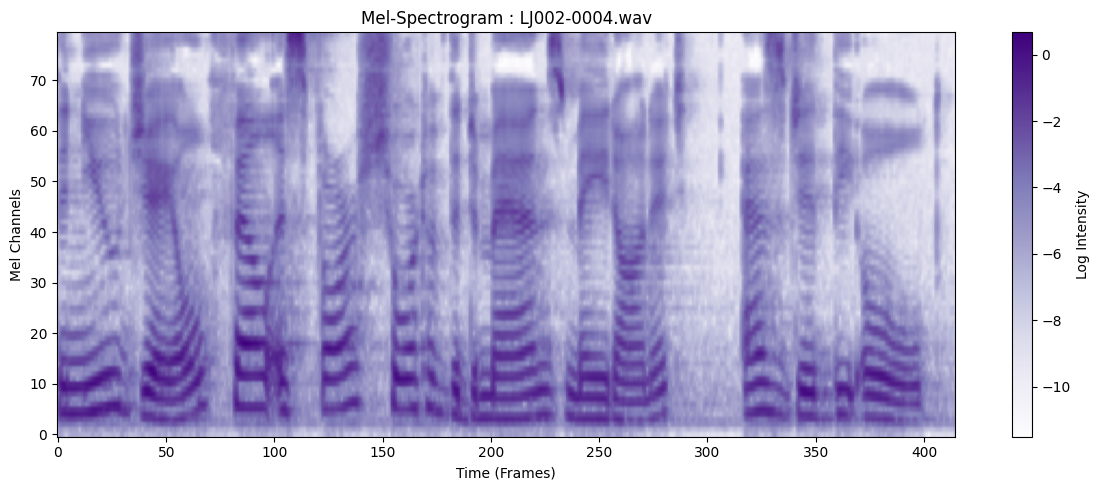

In [ ]:
# Choix d'un fichier audio (vérifie bien le nom du dossier 'wavs')
nomdu_fichier = 'LJ002-0004.wav'
target_wav = os.path.join(data_path, 'wavs', nomdu_fichier) 


mel_spec = load_and_process_audio(target_wav, mel_processor)

print(f"Spectrogramme généré avec succès !")
print(f"Taille : {mel_spec.shape} (Batch, Mel-channels, Time)")

# Affichage monochrome violet
plot_spectrogram(mel_spec, title=f"Mel-Spectrogram : {nomdu_fichier}")
# • Short windows: large temporal precision.
# • Long windows: large frequency precision.
